# Naufrágio do Titanic
O objetivo desse projeto é, através da análise exploratória dos dados, obter insights e desenvolver um modelo de classificação capaz de prever se uma pessoa sobreviveu ou não ao naufrágio do Titanic.

## Apresentando os dados
Utilizarei o conjunto de dados disponibilizados no Kaggle(https://www.kaggle.com/c/titanic.

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
#Import dos dados
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

Trabalharei apenas com os dados de treino para desenvolver o modelo, e utilizarei os dados do conjunto de teste para avaliar o modelo.

## Conhecendo os dados de treino

In [3]:
train_exploration = train.copy()
train_exploration.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_exploration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


O conjunto de treino possui 891 registros e 12 colunas, a descrição de cada coluna/feature é apresentada a seguir. Uma observação a ser feita é que as colunas Age, Cabin e Embarked possuem valaores nulos.

Descrição das colunas:
* PassengerId: Id do passageiro, identificador único
* Survived: Feature categórica que indica se o passageiro sobrevieu ou não. 0 = Não, 1 = Sim
* Pclass: Feature categórica que indica em qual classe o passageiro viajou. 1 = Primeira Classe; 2 = Segunda Classe; 3 = Terceira Classe
* Name: Nome do passageiro
* Sex: Sexo do passageiro
* Age: Idade do passageiro
* SibSp: Indica a quantidade de irmãos ou cônjuges que o paciente possuía na embarcação
* Parch: Indica a quantidade de pais ou filhos que o paciente possuía na embarcação
* Ticket: Idetificador da passagem
* Fare: Valor da passagem
* Cabin: Identificador da cabine
* Embarked: Feature categórica que indica em qual porto o passageiro embarcou. C = Cherbourg, Q = Queenstown, S = Southampton

Dessas features temos que:
* 7 são numéricas: PassengerId, Survived, Pclass, Age, SibSp, Parch e Fare.
* 5 são categóricas: Name, Sex, Ticket, Cabin e Embarked.

### Explorando os dados numéricos

In [5]:
#Utilizando o método describe() para visualizar as medidas centrais das variáveis numéricas
train_exploration.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* A feature PassengerId é irrelevante e atrapalhará na análise
* A feature Survived é a variável target do problem
* A feature Pclass será tratada como categórica, pois tem valores possíveis pre-definidos

Explorarei apenas as features Age, SibSp, Parch, Fare como numéricas.

In [6]:
df_num = train_exploration[['Age','SibSp','Parch','Fare']]

C:\Users\LeticiaMayumiDoyOkam\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\LeticiaMayumiDoyOkam\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


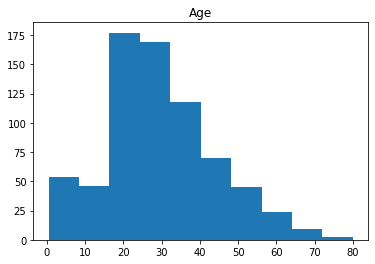

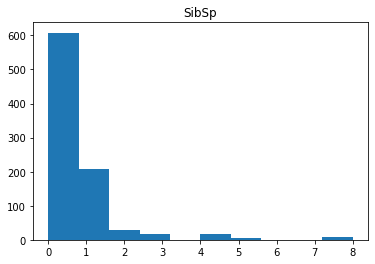

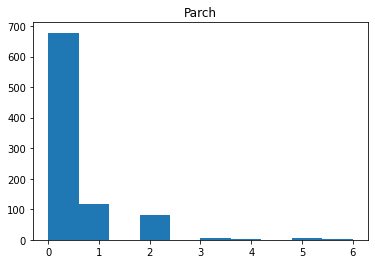

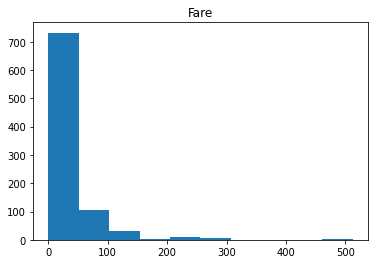

In [7]:
#Histograma
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

* Age segue uma distribuição quase normal
* Demais features não possuem distribuição normal, possuem picos em valores baixos. Para melhorar podem ser normalizados e terem uma distribuição mais normal

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

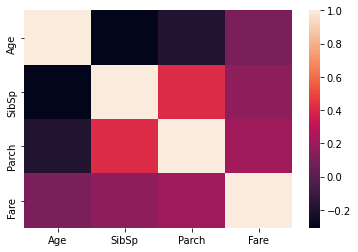

In [8]:
#Correlação
print(df_num.corr())
sns.heatmap(df_num.corr())

* SibSp e Parch tem uma correlação alta, indicando uma tendência de viagem em família
* Age tem forte correlação negativa com SibSp e Parch.

In [9]:
# Comparando a taxa de sobrvivência com Age, SibSp, Parch, and Fare 
pd.pivot_table(train_exploration, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


* A média de idade dos sobreviventes é um pouco menor do que a dos não sobreviventes

### Explorando os dados categóricos

In [10]:
#Utilizando o método describe() para visualizar as medidas centrais das variáveis categóricas
train_exploration.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Jussila, Mr. Eiriik",male,347082,G6,S
freq,1,577,7,4,644


* Name é único para cada registro

Além dessas features, também serão tratadas como categóricas Survived e Pclass.

In [11]:
df_cat = train_exploration[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

C:\Users\LeticiaMayumiDoyOkam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


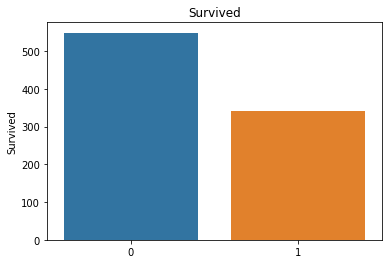

C:\Users\LeticiaMayumiDoyOkam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


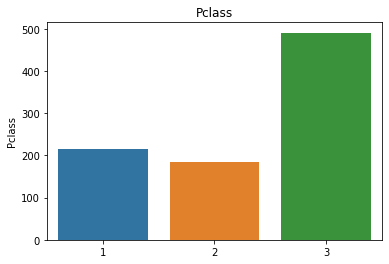

C:\Users\LeticiaMayumiDoyOkam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


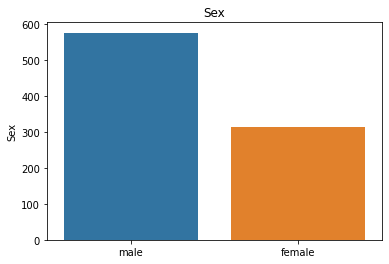

C:\Users\LeticiaMayumiDoyOkam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


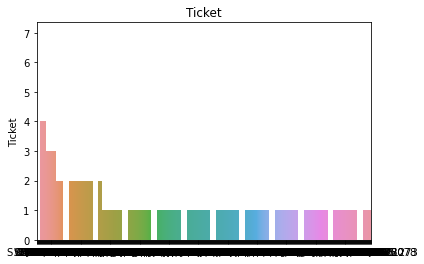

C:\Users\LeticiaMayumiDoyOkam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


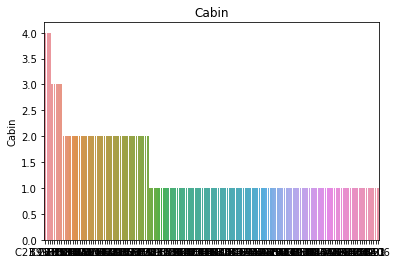

C:\Users\LeticiaMayumiDoyOkam\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


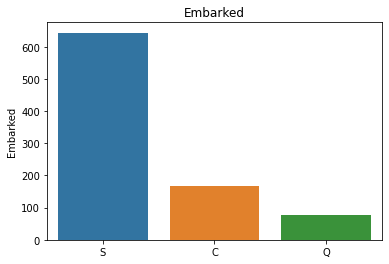

In [12]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

* Uma maior quantidade de passageiros não sobreviveu, eram da terceira classe, homems e embarcaram em Southampton(S);
* Ticket e Cabin possuem muitos dados variados, pode ser necessária feature engineering para extrair mais informaçãoes.

In [13]:
# método para calcular a proporção de sobreviventes
def proportion_survived(ds, attr1, attr2='Survived'):
    return ds[[attr1, attr2]].groupby([attr1], as_index=False).mean().sort_values(by=attr2, ascending=False)

In [14]:
#Comparando a quantidade de sobreviventes de cada sexo
print(pd.pivot_table(train_exploration, index='Survived', columns = 'Sex', values = 'PassengerId' ,aggfunc ='count'))
proportion_survived(train_exploration,'Sex')

Sex       female  male
Survived              
0             81   468
1            233   109


,Sex,Survived
0,female,0.742038
1,male,0.188908


* Uma maior quantidade de mulheres sobreviveu

In [15]:
#Comparando a quantidade de sobreviventes de cada sexo
print(pd.pivot_table(train_exploration, index='Survived', columns = 'Pclass', values = 'PassengerId' ,aggfunc ='count'))
proportion_survived(train_exploration,'Pclass')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


* Passageiros da primeira classe tiveram uma maior proporção de sobrevivência

In [16]:
#Comparando a quantidade de sobreviventes de cada porto de embarque
print(pd.pivot_table(train_exploration, index='Survived', columns = 'Embarked', values = 'PassengerId' ,aggfunc ='count'))
proportion_survived(train_exploration,'Embarked')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


* Passageiros que embarcaram em Cherbourg tiveram maior proporção de sobrevivência

## Feature Engineering

#### Cabin

In [17]:
#Alguns valores possíveis de Cabin
train_exploration['Cabin'].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F2             3
              ..
A31            1
F G63          1
E50            1
D21            1
C106           1
Name: Cabin, Length: 147, dtype: int64

Os valores das cabines são formados por letras e números, essas letras podem definir a área do navio que estava localizado a cabine, podendo ter influência na sobrevivência do passageiro.

In [18]:
#Criando a categoria "Cabin_letter" relativa a letra presente no valor da cabine
#Para aqueles registros que não possuem cabine, será atribuida a categoria 'n'
train_exploration['Cabin_letter'] = train_exploration["Cabin"].apply(lambda x: str(x)[0])
train_exploration['Cabin_letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_letter, dtype: int64

In [19]:
#Comparando a quantidade de sobreviventes de cada letra da cabine
print(pd.pivot_table(train_exploration, index='Survived', columns = 'Cabin_letter', values = 'PassengerId' ,aggfunc ='count'))
proportion_survived(train_exploration,'Cabin_letter')

Cabin_letter    A     B     C     D     E    F    G    T      n
Survived                                                       
0             8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1             7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


,Cabin_letter,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,n,0.299854
7,T,0.000000


* Algumas áreas de cabine tiveram mais sobreviventes.

Outra informação que podemos investigar é se a quantidade de cabines ligadas a cada passageiro pode influenciar na sobrevivência.

In [20]:
#Criando feature 'Cabin_qtd'
train_exploration['Cabin_qtd'] = train_exploration["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_exploration['Cabin_qtd'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_qtd, dtype: int64

In [21]:
#Comparando a quantidade de sobreviventes com cada quantidade de cabines
print(pd.pivot_table(train_exploration, index='Survived', columns = 'Cabin_qtd', values = 'PassengerId' ,aggfunc ='count'))
proportion_survived(train_exploration,'Cabin_qtd')

Cabin_qtd      0      1    2    3    4
Survived                              
0          481.0   58.0  7.0  3.0  NaN
1          206.0  122.0  9.0  3.0  2.0


,Cabin_qtd,Survived
4,4,1.000000
1,1,0.677778
2,2,0.562500
3,3,0.500000
0,0,0.299854


#### Ticket

In [22]:
train_exploration['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
347088      6
           ..
336439      1
349224      1
113786      1
28551       1
315098      1
Name: Ticket, Length: 681, dtype: int64

Alguns valores de tickets são formados por letras e números e outros apenas números. Essa composição afeta a taxa de sobrevivência?

In [23]:
#Criando a variável 'Ticket_numeric' para informar se o ticket é formado apenas por números ou não
train_exploration['Ticket_numeric'] = train_exploration["Ticket"].apply(lambda x: 1 if x.isnumeric() else 0)

In [24]:
#Comparando a quantidade de sobreviventes com cada quantidade de cabines
print(pd.pivot_table(train_exploration, index='Survived', columns = 'Ticket_numeric', values = 'PassengerId' ,aggfunc ='count'))
proportion_survived(train_exploration,'Ticket_numeric')

Ticket_numeric    0    1
Survived                
0               142  407
1                88  254


,Ticket_numeric,Survived
1,1,0.384266
0,0,0.382609


* O fato de ser apenas numérico ou não, não afeta as chances de sobrevivência

#### Name

In [25]:
train_exploration["Name"].value_counts()

Jussila, Mr. Eiriik                                         1
Keefe, Mr. Arthur                                           1
Kirkland, Rev. Charles Leonard                              1
Landergren, Miss. Aurora Adelia                             1
Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)    1
                                                           ..
Calic, Mr. Jovo                                             1
McCormack, Mr. Thomas Joseph                                1
Sutton, Mr. Frederick                                       1
Fortune, Miss. Mabel Helen                                  1
Bidois, Miss. Rosalie                                       1
Name: Name, Length: 891, dtype: int64

Todos os nomes estão associados a um título, esses títulos podem ter influência nos resultados.

In [26]:
#Criando nova coluna 'Name_title'
train_exploration['Name_title'] = train_exploration["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_exploration['Name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Mme               1
Don               1
Ms                1
the Countess      1
Jonkheer          1
Capt              1
Lady              1
Sir               1
Name: Name_title, dtype: int64

In [27]:
#Comparando a quantidade de sobreviventes com o título
print(pd.pivot_table(train_exploration, index='Survived', columns = 'Name_title', values = 'PassengerId' ,aggfunc ='count'))
proportion_survived(train_exploration,'Name_title')

Name_title  Capt  Col  Don   Dr  Jonkheer  Lady  Major  Master   Miss  Mlle  \
Survived                                                                      
0            1.0  1.0  1.0  4.0       1.0   NaN    1.0    17.0   55.0   NaN   
1            NaN  1.0  NaN  3.0       NaN   1.0    1.0    23.0  127.0   2.0   

Name_title  Mme     Mr   Mrs   Ms  Rev  Sir  the Countess  
Survived                                                   
0           NaN  436.0  26.0  NaN  6.0  NaN           NaN  
1           1.0   81.0  99.0  1.0  NaN  1.0           1.0  


,Name_title,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


* Títulos atribuídos a mulheres tiveram maior proporção de sobreviventes

#### SibSp e Parch

Essas duas features indicam uma família. Criarei duas novas features a partir delas:
* 'FamilySize': será a soma 'SibSp'+'Parch'+1(caso o passageiro esteja viajando sozinho);
* 'IsAlone': caso o passageiro esteja viajando sozinho receberá valor 1, caso contrário, receberá valor 0.

In [28]:
train_exploration['FamilySize'] = train_exploration['SibSp'] + train_exploration['Parch'] + 1
train_exploration['IsAlone'] = train_exploration["FamilySize"].apply(lambda x: 1 if x==1 else 0)

In [29]:
#Comparando a quantidade de sobreviventes com FamilySize
print(pd.pivot_table(train_exploration, index='Survived', columns = ['FamilySize','IsAlone'] , values = 'PassengerId' ,aggfunc ='count'))
proportion_survived(train_exploration,'FamilySize')

FamilySize     1     2     3     4     5     6    7    8    11
IsAlone         1     0     0     0     0     0    0    0    0
Survived                                                      
0           374.0  72.0  43.0   8.0  12.0  19.0  8.0  6.0  7.0
1           163.0  89.0  59.0  21.0   3.0   3.0  4.0  NaN  NaN


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
proportion_survived(train_exploration,'IsAlone')

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


* Passageiros acompanhados pela família sobreviveram mais

                PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId        1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived          -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass            -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age                0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp             -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch             -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare               0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
Cabin_qtd          0.015536  0.277053 -0.647116  0.172708  0.012150  0.127846   
Ticket_numeric     0.072291  0.001492  0.079763 -0.029886 -0.080768 -0.035762   
FamilySize        -0.040143  0.016639  0.065997 -0.301914  0.890712  0.783111   
IsAlone            0.057462 -0.203367  0.135207  0.198270 -0.584471 -0.583398   

                    Fare  C

<AxesSubplot:>

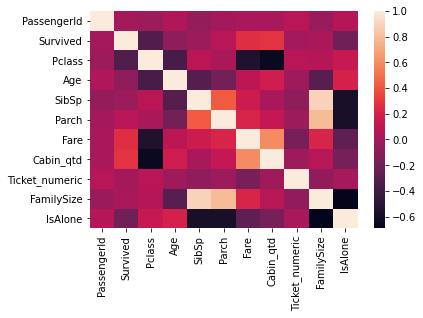

In [31]:
print(train_exploration.corr())
sns.heatmap(train_exploration.corr())

### Processamento dos Dados

O processamento dos dados para treinamento consistirá em:
* Incluir as novas features estudadas;
* Eliminar os registros com 'Embarked' nulos;
* Preencher os valores faltantes de 'Age' e 'Fare' com a mediana dessas features;
* Normalizar 'Fare' para ter uma distribuição normal;
* Selecionar apenas as features que agregam informação;
* Transformar os dados categóricos em numéricos.

In [32]:
#Combinando os datasets para aplicar as transformações em ambos conjuntos
train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([train,test])

In [33]:
from sklearn.preprocessing import PowerTransformer

all_data['Cabin_letter'] = all_data["Cabin"].apply(lambda x: str(x)[0])
all_data['Cabin_qtd'] = all_data["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['Name_title'] = all_data["Name"].apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data['FamilySize'] = all_data['SibSp'] + all_data['Parch'] + 1
all_data['IsAlone'] = all_data["FamilySize"].apply(lambda x: 1 if x==1 else 0)

all_data.dropna(subset=['Embarked'], inplace=True)

all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())
all_data['Fare'] = all_data['Fare'].fillna(all_data['Fare'].median())

pt = PowerTransformer()
all_data['Fare'] = pt.fit_transform(all_data[['Fare']])

all_data_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_letter', 'Cabin_qtd', 'Name_title', 'IsAlone', 'train_test']])

In [34]:
X_train = all_data_dummies[all_data_dummies['train_test']==1].drop(['train_test'], axis =1)
X_test = all_data_dummies[all_data_dummies['train_test']==0].drop(['train_test'], axis =1)

y_train = all_data[all_data['train_test']==1]['Survived']

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   889 non-null    int64  
 1   Age                      889 non-null    float64
 2   Fare                     889 non-null    float64
 3   Cabin_qtd                889 non-null    int64  
 4   IsAlone                  889 non-null    int64  
 5   Sex_female               889 non-null    uint8  
 6   Sex_male                 889 non-null    uint8  
 7   Embarked_C               889 non-null    uint8  
 8   Embarked_Q               889 non-null    uint8  
 9   Embarked_S               889 non-null    uint8  
 10  Cabin_letter_A           889 non-null    uint8  
 11  Cabin_letter_B           889 non-null    uint8  
 12  Cabin_letter_C           889 non-null    uint8  
 13  Cabin_letter_D           889 non-null    uint8  
 14  Cabin_letter_E           8

In [36]:
y_train.shape

(889,)

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   418 non-null    int64  
 1   Age                      418 non-null    float64
 2   Fare                     418 non-null    float64
 3   Cabin_qtd                418 non-null    int64  
 4   IsAlone                  418 non-null    int64  
 5   Sex_female               418 non-null    uint8  
 6   Sex_male                 418 non-null    uint8  
 7   Embarked_C               418 non-null    uint8  
 8   Embarked_Q               418 non-null    uint8  
 9   Embarked_S               418 non-null    uint8  
 10  Cabin_letter_A           418 non-null    uint8  
 11  Cabin_letter_B           418 non-null    uint8  
 12  Cabin_letter_C           418 non-null    uint8  
 13  Cabin_letter_D           418 non-null    uint8  
 14  Cabin_letter_E           4

### Testando modelos

Irei testar os seguintes modelos de classificação:
* Naive Bayes
* Regressão Logística
* Árvore de decisão
* Random Forest
* KNN
* SVM

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### Naive Bayes

In [47]:
nb = GaussianNB()
scores = cross_val_score(nb, X_train, y_train, cv=5)
print("%0.3f accuracy" % (scores.mean()))

0.723 accuracy


#### Regressão logística

In [48]:
lr = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("%0.3f accuracy" % (scores.mean()))

0.801 accuracy


#### Árvore de decisão

In [49]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print("%0.3f accuracy" % (scores.mean()))

0.787 accuracy


#### Random Forest

In [50]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print("%0.3f accuracy" % (scores.mean()))

0.811 accuracy


#### KNN

In [51]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_train, y_train, cv=5)
print("%0.3f accuracy" % (scores.mean()))

0.785 accuracy


#### SVM

In [52]:
svm = SVC()
scores = cross_val_score(svm, X_train, y_train, cv=5)
print("%0.3f accuracy" % (scores.mean()))

0.724 accuracy


O melhor modelo até agora foi o RandomForest. Irei tentar melhora-ló através de seus hiperparâmetros.
<hr>

In [53]:
#parâmetros atuais
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_estimators':[100,500,100],
    'max_depth':[3,5,10,20,50,75,100,None],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,2,5,10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap':[True,False]
}

rf_random = RandomizedSearchCV(rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose = True, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

print('Best Score: ' + str(rf_random.best_score_))
print('Best Parameters: ' + str(rf_random.best_params_))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min


Best Score: 0.8335491652383673
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished


Com uma ideia melhor de quais hiperparâmetros podem ajudar no modelo, podemos utilizar Grid Search para avaliar todas as nossas combinações.

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200,300,500],
    'max_depth':[20,50,100,None],
    'min_samples_split':[3,5,10],
    'min_samples_leaf':[1,2,3,5],
    'max_features': ['auto', 'sqrt', 5, 10],
    'bootstrap':[True,False]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1)
best_rf_grid = grid_search.fit(X_train, y_train)

print('Best Score: ' + str(best_rf_grid.best_score_))
print('Best Parameters: ' + str(best_rf_grid.best_params_))

Best Score: 0.8391734907636641
Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 500}


<AxesSubplot:>

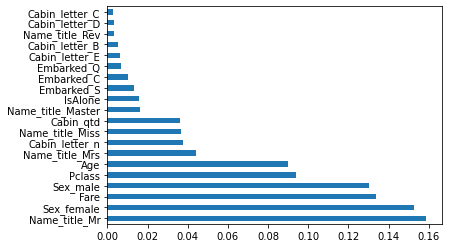

In [60]:
best_rf = best_rf_grid.best_estimator_.fit(X_train, y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Criando o arquivo para subissão no kaggle

In [61]:
y_pred = best_rf.predict(X_test).astype(int)

In [64]:
submission = pd.Series(y_pred, index=test['PassengerId'], name='Survived')
submission.to_csv("rf_submission.csv", header=True)

<hr>
Acurácia de <b>77,272%</b> no Kaggle